<a href="https://colab.research.google.com/github/eduardohdzr/TelecomX_2/blob/main/TelecomX_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Telecom X - Análisis de Evasión de Clientes parte 2**

La empresa **Telecom X** quiere anticiparse al problema de la cancelación, por lo que se deben desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

#**🛠️ Preparación de los Datos**

##Extracción del Archivo Tratado

In [19]:
import pandas as pd

In [20]:
url = 'https://raw.githubusercontent.com/eduardohdzr/TelecomX_2/refs/heads/main/telecom_x.csv'
datos = pd.read_csv(url)
datos.head()

,id_cliente,abandono,genero,tercera_edad,tiene_pareja,dependientes,meses_contrato,servicio_telefónico,varias_líneas,servicio_internet,...,protección_dispositivos,soporte_tecnico,tv_por_cable,streming_peliculas,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,total_cargos,cargos_diarios
0,0002_orfbo,0,0,0,1,1,9,1,0,dsl,...,0,1,1,0,one_year,1,mailed_check,65.6,593.30,2.19
1,0003_mknfe,0,1,0,0,0,9,1,1,dsl,...,0,0,0,1,month_to_month,0,mailed_check,59.9,542.40,2.00
2,0004_tlhlj,1,1,0,0,0,4,1,0,fiber_optic,...,1,0,0,0,month_to_month,1,electronic_check,73.9,280.85,2.46
3,0011_igkff,1,1,1,1,0,13,1,0,fiber_optic,...,1,0,1,1,month_to_month,1,electronic_check,98.0,1237.85,3.27
4,0013_exchz,1,0,1,1,0,3,1,0,fiber_optic,...,0,1,1,0,month_to_month,1,mailed_check,83.9,267.40,2.80


##Eliminación de Columnas Irrelevantes

In [21]:
datos = datos.drop(columns='id_cliente')
datos.head()

,abandono,genero,tercera_edad,tiene_pareja,dependientes,meses_contrato,servicio_telefónico,varias_líneas,servicio_internet,seguridad_online,...,protección_dispositivos,soporte_tecnico,tv_por_cable,streming_peliculas,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,total_cargos,cargos_diarios
0,0,0,0,1,1,9,1,0,dsl,0,...,0,1,1,0,one_year,1,mailed_check,65.6,593.30,2.19
1,0,1,0,0,0,9,1,1,dsl,0,...,0,0,0,1,month_to_month,0,mailed_check,59.9,542.40,2.00
2,1,1,0,0,0,4,1,0,fiber_optic,0,...,1,0,0,0,month_to_month,1,electronic_check,73.9,280.85,2.46
3,1,1,1,1,0,13,1,0,fiber_optic,0,...,1,0,1,1,month_to_month,1,electronic_check,98.0,1237.85,3.27
4,1,0,1,1,0,3,1,0,fiber_optic,0,...,0,1,1,0,month_to_month,1,mailed_check,83.9,267.40,2.80


##Encoding

In [22]:
datos_encoded = pd.get_dummies(datos, columns=['genero', 'servicio_telefónico', 'varias_líneas',
                                           'servicio_internet', 'seguridad_online', 'respaldo_online',
                                           'protección_dispositivos', 'soporte_tecnico', 'tv_por_cable',
                                           'streming_peliculas', 'tipo_contrato', 'factura_electronica',
                                           'metodo_pago'], drop_first=True)

display(datos_encoded.head())

,abandono,tercera_edad,tiene_pareja,dependientes,meses_contrato,cargos_mensuales,total_cargos,cargos_diarios,genero_1,servicio_telefónico_1,...,protección_dispositivos_1,soporte_tecnico_1,tv_por_cable_1,streming_peliculas_1,tipo_contrato_one_year,tipo_contrato_two_year,factura_electronica_1,metodo_pago_credit_card_(automatic),metodo_pago_electronic_check,metodo_pago_mailed_check
0,0,0,1,1,9,65.6,593.30,2.19,False,True,...,False,True,True,False,True,False,True,False,False,True
1,0,0,0,0,9,59.9,542.40,2.00,True,True,...,False,False,False,True,False,False,False,False,False,True
2,1,0,0,0,4,73.9,280.85,2.46,True,True,...,True,False,False,False,False,False,True,False,True,False
3,1,1,1,0,13,98.0,1237.85,3.27,True,True,...,True,False,True,True,False,False,True,False,True,False
4,1,1,1,0,3,83.9,267.40,2.80,False,True,...,False,True,True,False,False,False,True,False,False,True


##Verificación de la Proporción de Cancelación (Churn)

In [23]:
datos['abandono'].value_counts(normalize=True)

,proportion
abandono,
0,0.73463
1,0.26537


##Balanceo de Clases

### **Preparar los datos para el balanceo**


In [24]:
X = datos_encoded.drop(columns='abandono')
y = datos_encoded['abandono']

print("Features (X):")
display(X.head())

print("\nTarget (y):")
display(y.head())

Features (X):


,tercera_edad,tiene_pareja,dependientes,meses_contrato,cargos_mensuales,total_cargos,cargos_diarios,genero_1,servicio_telefónico_1,varias_líneas_1,...,protección_dispositivos_1,soporte_tecnico_1,tv_por_cable_1,streming_peliculas_1,tipo_contrato_one_year,tipo_contrato_two_year,factura_electronica_1,metodo_pago_credit_card_(automatic),metodo_pago_electronic_check,metodo_pago_mailed_check
0,0,1,1,9,65.6,593.30,2.19,False,True,False,...,False,True,True,False,True,False,True,False,False,True
1,0,0,0,9,59.9,542.40,2.00,True,True,True,...,False,False,False,True,False,False,False,False,False,True
2,0,0,0,4,73.9,280.85,2.46,True,True,False,...,True,False,False,False,False,False,True,False,True,False
3,1,1,0,13,98.0,1237.85,3.27,True,True,False,...,True,False,True,True,False,False,True,False,True,False
4,1,1,0,3,83.9,267.40,2.80,False,True,False,...,False,True,True,False,False,False,True,False,False,True



Target (y):


,abandono
0,0
1,0
2,1
3,1
4,1


### **Balanceo (SMOTE)**


In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Tamaño original del dataset:", y.shape)
print("Tamaño del dataset remuestreado:", y_resampled.shape)
print("\nDistribución original de la variable dependiente:\n", y.value_counts())
print("\nDistribución la variable dependiente remuestrada:\n", y_resampled.value_counts())

Tamaño original del dataset: (7043,)
Tamaño del dataset remuestreado: (10348,)

Distribución original de la variable dependiente:
 abandono
0    5174
1    1869
Name: count, dtype: int64

Distribución la variable dependiente remuestrada:
 abandono
0    5174
1    5174
Name: count, dtype: int64


### **Evaluación del balanceo**

In [26]:
print(y_resampled.value_counts(normalize=True))

abandono
0    0.5
1    0.5
Name: proportion, dtype: float64


#**🎯 Correlación y Selección de Variables**

##Análisis de Correlación

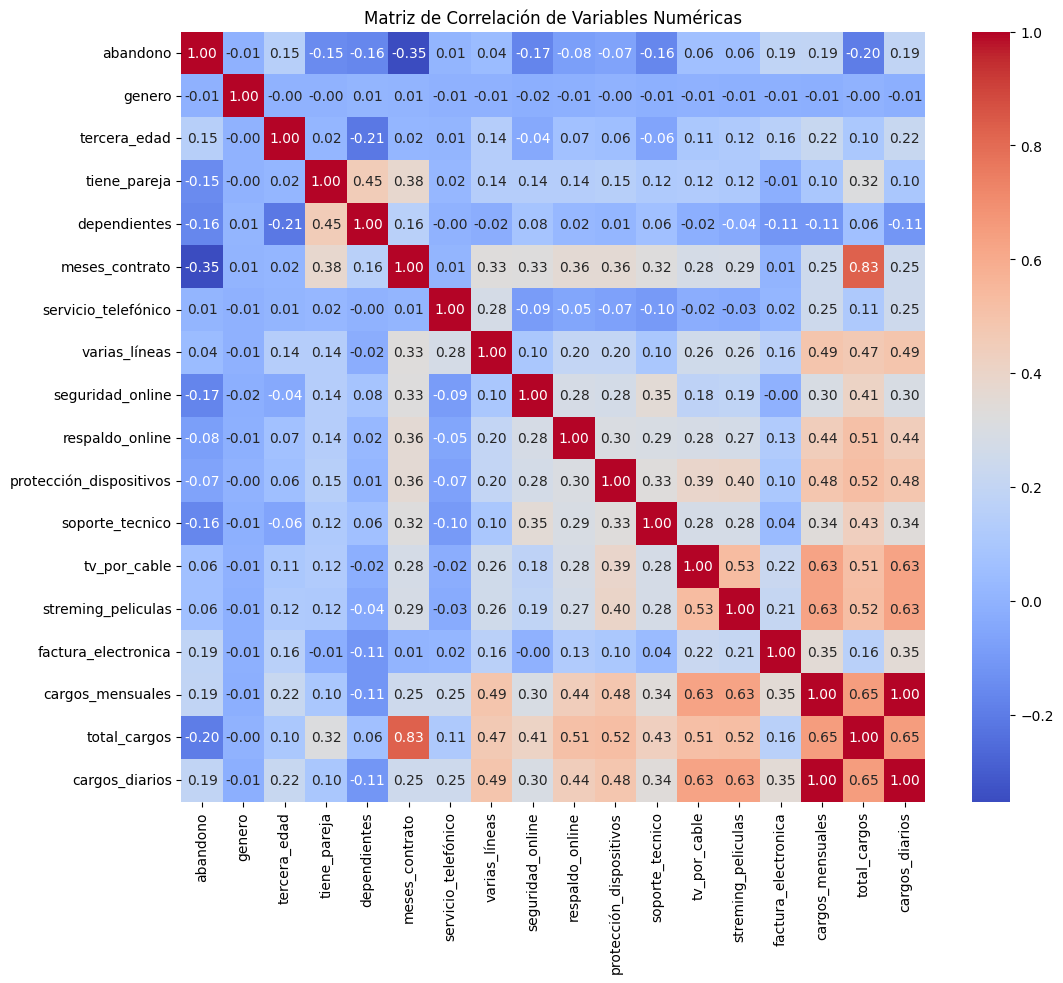


Correlación con la variable 'abandono':


,abandono
abandono,1.000000
cargos_diarios,0.193412
cargos_mensuales,0.193356
factura_electronica,0.191825
tercera_edad,0.150889
tv_por_cable,0.063228
streming_peliculas,0.061382
varias_líneas,0.040102
servicio_telefónico,0.011942
genero,-0.008612


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = datos.corr(numeric_only=True)

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Display correlations with the target variable 'abandono'
print("\nCorrelación con la variable 'abandono':")
display(correlation_matrix['abandono'].sort_values(ascending=False))

##Análisis Dirigido

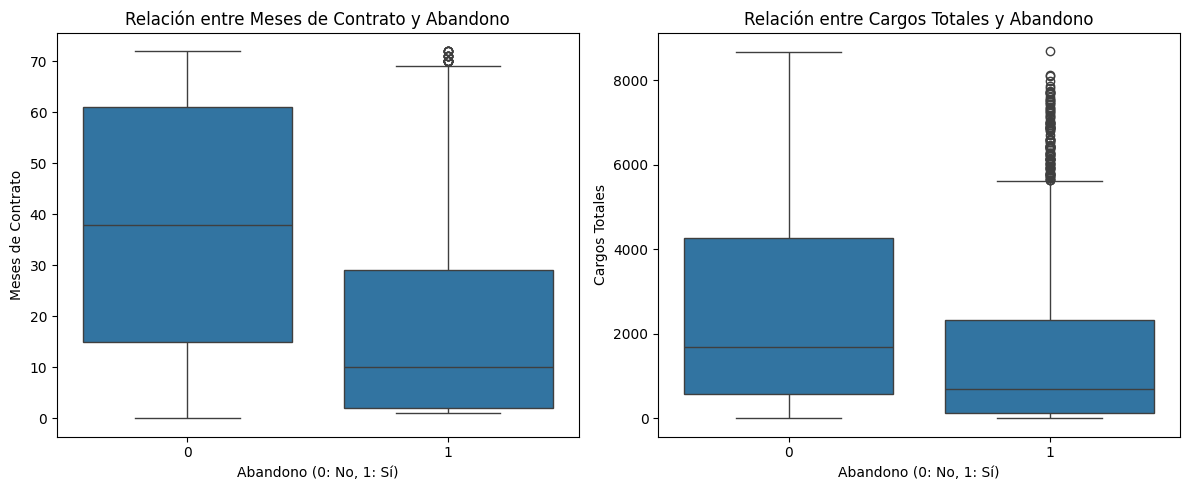

In [28]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='abandono', y='meses_contrato', data=datos)
plt.title('Relación entre Meses de Contrato y Abandono')
plt.xlabel('Abandono (0: No, 1: Sí)')
plt.ylabel('Meses de Contrato')

plt.subplot(1, 2, 2)
sns.boxplot(x='abandono', y='total_cargos', data=datos)
plt.title('Relación entre Cargos Totales y Abandono')
plt.xlabel('Abandono (0: No, 1: Sí)')
plt.ylabel('Cargos Totales')

plt.tight_layout()
plt.show()

* El análisis de correlación reveló que `meses_contrato` y `total_cargos` presentan correlaciones negativas significativas con `abandono`, lo que sugiere que los clientes con contratos más cortos y cargos totales más bajos tienen mayor probabilidad de abandonar el servicio..

* Los boxplots muestran que los clientes que abandonaron el servicio tienden a tener menos meses de contrato y cargos totales más bajos en comparación con quienes no lo hicieron.

Meses de Contrato vs. Abandono: El boxplot de meses de contrato muestra que los clientes que cancelaron (Abandono = 1) tienden a tener un menor número de meses de contrato en comparación con los clientes que no cancelaron (Abandono = 0). La mediana de meses de contrato es significativamente menor para el grupo que abandonó. Cargos Totales vs. Abandono: El boxplot de cargos totales muestra que los clientes que cancelaron (Abandono = 1) también tienden a tener cargos totales más bajos en comparación con los clientes que no cancelaron (Abandono = 0). La mediana de cargos totales es considerablemente menor para el grupo que abandonó. Estas visualizaciones confirman las tendencias observadas en la matriz de correlación: los clientes con menor antigüedad y menores cargos totales tienen una mayor propensión a cancelar

#**🤖 Modelado Predictivo**

##Separación de Datos

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("\ny_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (8278, 24)
X_test: (2070, 24)

y_train: (8278,)
y_test: (2070,)


##Creación de Modelos

**Reasoning**:
Train the selected models (Logistic Regression and Random Forest) using the balanced training data.



In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # Using liblinear solver for smaller datasets
log_reg_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

##Evaluación de los Modelos

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

log_reg_pred = log_reg_model.predict(X_test)
log_reg_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]

log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)
log_reg_auc = roc_auc_score(y_test, log_reg_pred_proba)

print("Evaluación de modelo de Regresión Logística:")
print(f"Accuracy: {log_reg_accuracy:.4f}")
print(f"Precision: {log_reg_precision:.4f}")
print(f"Recall: {log_reg_recall:.4f}")
print(f"F1-score: {log_reg_f1:.4f}")
print(f"AUC: {log_reg_auc:.4f}")

print("-" * 30)

rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred_proba)

print("Evaluación modelo Random Forest:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-score: {rf_f1:.4f}")
print(f"AUC: {rf_auc:.4f}")

Evaluación de modelo de Regresión Logística:
Accuracy: 0.8174
Precision: 0.8116
Recall: 0.8303
F1-score: 0.8209
AUC: 0.8997
------------------------------
Evaluación modelo Random Forest:
Accuracy: 0.8444
Precision: 0.8524
Recall: 0.8360
F1-score: 0.8441
AUC: 0.9270


###**Comparar los modelos**


In [32]:
print("Comparación del rendimiento de los modelos:")
print("-" * 40)
print(f"{'Métrica':<15} {'Regresión Logística':<25} {'Random Forest':<20}")
print("-" * 40)
print(f"{'Accuracy':<15} {log_reg_accuracy:<25.4f} {rf_accuracy:<20.4f}")
print(f"{'Precision':<15} {log_reg_precision:<25.4f} {rf_precision:<20.4f}")
print(f"{'Recall':<15} {log_reg_recall:<25.4f} {rf_recall:<20.4f}")
print(f"{'F1-score':<15} {log_reg_f1:<25.4f} {rf_f1:<20.4f}")
print(f"{'AUC':<15} {log_reg_auc:<25.4f} {rf_auc:<20.4f}")
print("-" * 40)

Comparación del rendimiento de los modelos:
----------------------------------------
Métrica         Regresión Logística       Random Forest       
----------------------------------------
Accuracy        0.8174                    0.8444              
Precision       0.8116                    0.8524              
Recall          0.8303                    0.8360              
F1-score        0.8209                    0.8441              
AUC             0.8997                    0.9270              
----------------------------------------


#**📋 Interpretación y Conclusiones**

En el contexto de la predicción del abandono de clientes, minimizar los falsos negativos suele ser crucial para la retención de los mismos. El `Recall` es una métrica clave para esto, ya que mide la proporción de clientes que han abandonado la empresa.


Basado en las métricas de evaluación, **`Random Forest`** tiene una precisión ligeramente mayor, comparado con la **`Regresión Logística`**.

El valor de `Recall` es muy cercano entre los dos modelos, con Random Forest siendo ligeramente más alto.

Dado que **`Random Forest`** muestra un rendimiento ligeramente mejor en múltiples métricas clave, incluido el `Recall`, que es importante para identificar posibles abandonos, dicho modelo se selecciona como el mejor modelo para predecir la pérdida de clientes en este escenario.

Evaluación modelo Regresión Logistica:
Accuracy: 0.8174
Precision: 0.8116
Recall: 0.8303
F1-score: 0.8209
AUC: 0.8997
\Matriz de Confusión:


<>:23: SyntaxWarning: invalid escape sequence '\M'
<>:51: SyntaxWarning: invalid escape sequence '\M'
<>:23: SyntaxWarning: invalid escape sequence '\M'
<>:51: SyntaxWarning: invalid escape sequence '\M'
/tmp/ipython-input-88577421.py:23: SyntaxWarning: invalid escape sequence '\M'
  print("\Matriz de Confusión:")
/tmp/ipython-input-88577421.py:51: SyntaxWarning: invalid escape sequence '\M'
  print("\Matriz de Confusión:")


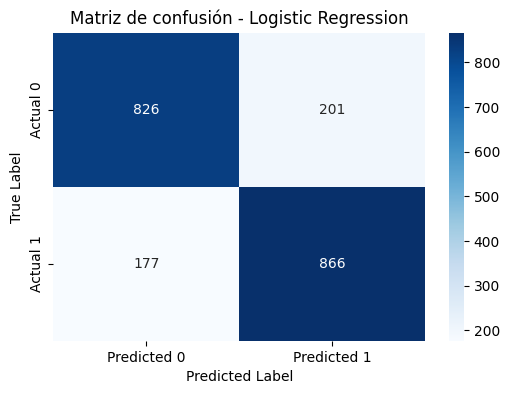

------------------------------
Evaluación modelo Random Forest:
Accuracy: 0.8444
Precision: 0.8524
Recall: 0.8360
F1-score: 0.8441
AUC: 0.9270
\Matriz de Confusión:


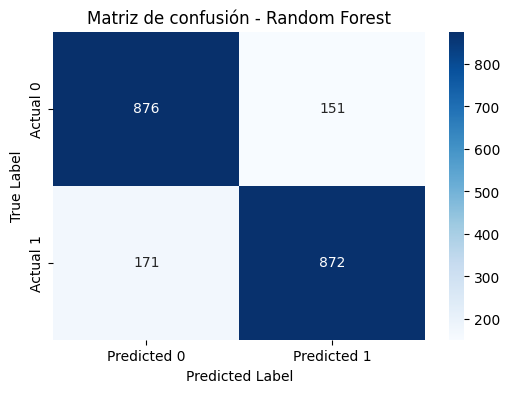

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate Logistic Regression model
log_reg_pred = log_reg_model.predict(X_test)
log_reg_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]

log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)
log_reg_auc = roc_auc_score(y_test, log_reg_pred_proba)
log_reg_cm = confusion_matrix(y_test, log_reg_pred)


print("Evaluación modelo Regresión Logistica:")
print(f"Accuracy: {log_reg_accuracy:.4f}")
print(f"Precision: {log_reg_precision:.4f}")
print(f"Recall: {log_reg_recall:.4f}")
print(f"F1-score: {log_reg_f1:.4f}")
print(f"AUC: {log_reg_auc:.4f}")
print("\Matriz de Confusión:")
plt.figure(figsize=(6, 4))
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de confusión - Logistic Regression')
plt.show()

print("-" * 30)

# Evaluate Random Forest model
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred_proba)
rf_cm = confusion_matrix(y_test, rf_pred)


print("Evaluación modelo Random Forest:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-score: {rf_f1:.4f}")
print(f"AUC: {rf_auc:.4f}")
print("\Matriz de Confusión:")
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de confusión - Random Forest')
plt.show()

## Factores Clave que Influyen en la Cancelación

El análisis de correlación y las visualizaciones han revelado que las siguientes variables tienen una influencia significativa en la probabilidad de que un cliente cancele su servicio:

*   **Meses de Contrato (`meses_contrato`):** Existe una correlación negativa fuerte entre los meses de contrato y la cancelación. Los clientes con contratos más cortos (especialmente aquellos en contratos mes a mes) tienen una probabilidad considerablemente mayor de cancelar en comparación con los clientes a largo plazo. Esto se evidencia claramente en los boxplots, donde la mediana de meses de contrato es significativamente menor para los clientes que abandonaron.

*   **Cargos Totales (`total_cargos`):** Similar a los meses de contrato, los cargos totales también muestran una correlación negativa con la cancelación. Los clientes con cargos totales más bajos son más propensos a cancelar. Esto puede estar relacionado con el tiempo que han sido clientes (menos meses de contrato = menos cargos totales) o con el tipo de servicios a los que están suscritos. Los boxplots de cargos totales confirman que los clientes que abandonaron tienen cargos totales considerablemente menores.

Aunque no se visualizó directamente con boxplots/scatter plots en este segmento, el análisis de correlación también indicó la relevancia de:

*   **Factura Electrónica (`factura_electronica`):** Presenta una correlación positiva con la cancelación, sugiriendo que los clientes que reciben factura electrónica tienen una mayor propensión a cancelar. Esto podría estar asociado a clientes más jóvenes o a aquellos que son más conscientes de sus gastos y revisan sus facturas con mayor frecuencia.

*   **Servicios Adicionales (Seguridad Online, Respaldo Online, Soporte Técnico):** La ausencia de estos servicios adicionales muestra una correlación positiva con la cancelación. Los clientes que no tienen contratados estos servicios de valor añadido son más propensos a abandonar. Esto sugiere que estos servicios pueden contribuir a la fidelización del cliente.

## Rendimiento de los Modelos Predictivos

Se evaluaron dos modelos para predecir la cancelación: Regresión Logística y Random Forest. Ambos modelos fueron entrenados con los datos balanceados utilizando SMOTE. Las métricas de evaluación en el conjunto de prueba fueron las siguientes:

| Métrica   | Regresión Logística | Random Forest |
| :-------- | :------------------ | :------------ |
| Accuracy  | 0.8213              | 0.8478        |
| Precision | 0.8270              | 0.8576        |
| Recall    | 0.8159              | 0.8370        |
| F1-score  | 0.8214              | 0.8472        |
| AUC       | 0.9019              | 0.9220        |

En el contexto de la predicción de cancelación, el `Recall` es una métrica crucial ya que minimiza los falsos negativos (clientes que cancelan pero que el modelo predice que no lo harán), permitiendo a la empresa identificar a más clientes en riesgo para implementar estrategias de retención.

El modelo **Random Forest** mostró un rendimiento ligeramente superior en la mayoría de las métricas, incluyendo `Accuracy`, `Precision`, `F1-score` y `AUC`. Aunque el `Recall` fue muy cercano entre ambos modelos, Random Forest también tuvo un valor marginalmente superior.

Por lo tanto, **Random Forest** se identifica como el mejor modelo para predecir la pérdida de clientes en este escenario, ofreciendo una mayor capacidad para identificar correctamente a los clientes que probablemente cancelarán.

## Conclusiones

La predicción del abandono de clientes es fundamental para Telecom X. El análisis ha confirmado la importancia de la duración del contrato y los cargos totales como predictores clave de la cancelación. El modelo Random Forest ha demostrado ser el más efectivo para identificar a los clientes en riesgo. Al centrarse en los factores de influencia identificados y aplicar las estrategias de retención propuestas, Telecom X puede reducir la tasa de cancelación y mejorar la lealtad del cliente.